# Análisis de Sentimiento en Español

En las siguientes líneas, se abordará brevemente el análisis de sentimiento mediante métodos que implementaron al español como lenguaje.

Se abordará el problema desde un enfoque basado en palabras (lexicon based) y desde un enfoque basado en aprendizaje supervisado. En ambos casos, lo que se describirá será la positividad/negatividad de una sentencia, y no otro tipo de emociones

[Aquí](https://github.com/FernanOrtega/SentiLeak) se encuentra la documentación del primero, y [acá](https://github.com/sentiment-analysis-spanish/sentiment-spanish) la documentación del segundo.

In [ ]:
!pip install sentileak
!pip install sentiment_analysis_spanish

import pandas as pd # Data frames
from gensim.utils import tokenize # Tokenizacion, saca simbolos y números (para otras funcionalidades, hacerlo a mano o buscar en nltk)
from gensim.matutils import corpus2csc # Llevar las listas de palabras a una descripción frecuentista
from gensim.corpora import Dictionary # Armado de base de palabras
from gensim.models import TfidfModel # Implementación del modelo tf-idf
import nltk # En este caso, únicamente para stopwords

from sentileak import dataloader
from sentileak import SentiLeak # Lexicon Based Method

from sentiment_analysis_spanish import sentiment_analysis # Supervised Machine Learning Based Aproach

import seaborn as sbn
import matplotlib.pylab as plt
import numpy as np
from wordcloud import WordCloud
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Análisis Basado en Palabras

Como vimos previamente, este enfoque se basa en tener una lista de palabras (o lemas) asociados a un determinado sentimiento. Al ir a la documentación, podemos acceder a dicho conjunto de palabras y evaluar cuáles son las más positivas y cuáles no.

In [ ]:
sentiment_words = pd.DataFrame({i : item for i, item in enumerate(dataloader.load_dict('es', 'sentiment_words.csv').items())}).T.rename({0 : 'palabra/lema',
                                                                                                                                         1 : 'valoración'},
                                                                                                                                         axis = 1)
sentiment_words.sort_values(by = 'valoración')

,palabra/lema,valoración
2560,sopap,-4
2773,vehement,-4
741,culpabil,-4
899,desobedec,-4
2369,repugn,-4
...,...,...
1562,improb,4
193,amplif,4
170,amant,4
1745,languag,4


A grandes rasgos, para poder operar con este algortimo, resulta necesario:
    - inicializar el objeto de análisis: sentimental = SentiLeak()
    - aplicar el objeto sobre un determinado texto: sentimental.compute_sentiment(string)

In [ ]:
sentimental = SentiLeak() # Inicializamos el objeto
sentimental.compute_sentiment('Qué triste verte partir. Qué alegría saber que volverás')

{'global_sentiment': -1.0,
 'per_sentence_sentiment': [{'position': 0,
   'score': -3.0,
   'text': 'Qué triste verte partir.'},
  {'position': 1, 'score': 2.0, 'text': 'Qué alegría saber que volverás'}]}

Vemos que nos splitea el texto según el "." y analiza cada frase por separado. Después, el sentimiento global, pareciera ser la suma entre los sentimientos de cada sentencia. No está acotado el valor de sentimiento.

Por detrás, están operando varios algoritmos además del de sentiment. Primero, se lematizan las palabras, luego se evalúa la aparición de negaciones, y después parece computarse el sentimiento

## Análisis Basado en Aprendizaje Supervisado

Ahora bien, otro método interesante para determinar el sentimiento de sentencias es aquel basado en aprendizaje supervisado.

Supongan que tenemos un algoritmo de clasificación (cualquiera, el tuyo! -en este caso, naive bayes-) y que tenemos textos clasificados según su valoración (que provienen, por ejemplo, de comentarios de compra y venta de productos). Entonces, si entrenamos el algortimo, usando dichos textos, podremos clasificar a futuro nuevos textos, usando el algoritmo ya entrenado


Nuevamente, los pasos a seguir serán:
    - inicializar el objeto: sentimental = sentiment_analysis.SentimentAnalysisSpanish()
    - aplicarlo sobre un texto: sentimental.sentiment(string)

In [ ]:
sentimental = sentiment_analysis.SentimentAnalysisSpanish() # Inicializamos el objeto
sentimental.sentiment('Qué triste verte partir. Pero qué alegría saber que volverás') # Aplicamos el análisis

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.23.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator MultinomialNB from version 0.23.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


0.00022591894946840296

En este caso, el método devuelve la probabilidad de que un determinado texto tenga una connotación positiva.

Para emular el resultado obtenido por el método previo, podríamos splitear al texto por el "." y tomar la media:

In [ ]:
[sentimental.sentiment(f) for f in 'Qué triste verte partir. Qué alegría saber que volverás'.split('.')]

[0.010440466995690558, 0.03365975393545594]

## El caso de los tangos y sus letras

En las siguientes líneas, se hace un análisis sistemático de sentimiento sobre las letras de canciones disponibles en la página TodoTango.

La idea es jugar con estos análisis sobre un data set real y poder comparar qué está haciendo cada algoritmo

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

path = 'gdrive/MyDrive/Clase_08_06_21/'
nombre_archivo = 'todo_tangos.csv'
d_tangos = pd.read_csv(path + nombre_archivo) # Si quieren el script para bajar los datos, lo piden.
d_tangos.dropna(subset = ['letra'],
                inplace = True)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Vemos un poco el data set
d_tangos.head()

,url,titulo,ritmo,autor_letra,autor_musica,letra,ano
0,https://www.todotango.com/musica/tema/130/A-ba...,A bailar,Tango,Homero Expósito,Domingo Federico,¡A bailar a bailar que la orquesta se va! Sobr...,1943.0
1,https://www.todotango.com/musica/tema/7866/A-b...,A bailar el tango,Tango,Leopoldo Díaz Vélez,Leopoldo Díaz Vélez,Este tango nació para bailarse y así hamacarse...,1962.0
2,https://www.todotango.com/musica/tema/3647/A-B...,A Beba Bidart,Poemalunfardo,Alberto Uemura,NaN,Nació en la calle Quito entre Boedo y Colombre...,NaN
3,https://www.todotango.com/musica/tema/2864/A-b...,A bordo de mis zapatos,Milonga,Eugenio Majul,César Isella,Caminé todas las calles de Buenos Aires y es c...,NaN
4,https://www.todotango.com/musica/tema/3843/A-B...,A Buenos Aires,Milonga,Edmundo Rivero,Edmundo Rivero,En tu baraje gringo ciudad mía vas perdiendo t...,NaN


In [ ]:
# Un poco más
d_tangos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5736 entries, 0 to 5743
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   url           5736 non-null   object 
 1   titulo        5736 non-null   object 
 2   ritmo         5708 non-null   object 
 3   autor_letra   5724 non-null   object 
 4   autor_musica  5408 non-null   object 
 5   letra         5736 non-null   object 
 6   ano           2021 non-null   float64
dtypes: float64(1), object(6)
memory usage: 358.5+ KB


Ahora, aplicamos ambos métodos a las letras. El basado en lexicon, lo vamos a reescalear, usando el método min-max (hecho a mano), cosa de poder compararlo de cierta forma con el basado en aprendizaje supervisado.

In [ ]:
sentimental = SentiLeak() # Entrenamos y luego aplicamos el análisis de sentimiento basado en Lexicon
d_tangos['lexicon_sentimiento'] = d_tangos['letra'].apply(lambda x: sum([s['score'] for s in sentimental.compute_sentiment(x)['per_sentence_sentiment']]))
d_tangos['lexicon_sentimiento'] = (d_tangos['lexicon_sentimiento'] - d_tangos['lexicon_sentimiento'].min()) / (d_tangos['lexicon_sentimiento'].max() - d_tangos['lexicon_sentimiento'].min())


sentimental = sentiment_analysis.SentimentAnalysisSpanish() # Entrenamos y luego aplicamos el análisis de sentimiento basado en ML
d_tangos['ML_sentimiento'] = d_tangos['letra'].apply(lambda x: np.mean([sentimental.sentiment(f) for f in x.split('.')]))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.23.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator MultinomialNB from version 0.23.2 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


Ahora, veamos gráficamente cómo está distribuidos los valores obtenidos, si hay alguna relación interesante con respecto a las fechas de los tangos, y si existen diferencias entre distintos ritmos.

In [ ]:
d_tangos.lexico

,url,titulo,ritmo,autor_letra,autor_musica,letra,ano
0,https://www.todotango.com/musica/tema/130/A-ba...,A bailar,Tango,Homero Expósito,Domingo Federico,¡A bailar a bailar que la orquesta se va! Sobr...,1943.0
1,https://www.todotango.com/musica/tema/7866/A-b...,A bailar el tango,Tango,Leopoldo Díaz Vélez,Leopoldo Díaz Vélez,Este tango nació para bailarse y así hamacarse...,1962.0
2,https://www.todotango.com/musica/tema/3647/A-B...,A Beba Bidart,Poemalunfardo,Alberto Uemura,NaN,Nació en la calle Quito entre Boedo y Colombre...,NaN
3,https://www.todotango.com/musica/tema/2864/A-b...,A bordo de mis zapatos,Milonga,Eugenio Majul,César Isella,Caminé todas las calles de Buenos Aires y es c...,NaN
4,https://www.todotango.com/musica/tema/3843/A-B...,A Buenos Aires,Milonga,Edmundo Rivero,Edmundo Rivero,En tu baraje gringo ciudad mía vas perdiendo t...,NaN
...,...,...,...,...,...,...,...
5739,https://www.todotango.com/musica/tema/668/Zaraza/,Zaraza,Tango,Benjamín Tagle Lara,Benjamín Tagle Lara,Blanca huella que todos los dias clavado en el...,1929.0
5740,https://www.todotango.com/musica/tema/1011/Zor...,Zorrita maula,Tango,Francisco Brancatti,Agustín Magaldi,Escuche aparcero: Jué en un mes de julio azota...,NaN
5741,https://www.todotango.com/musica/tema/138/Zorr...,Zorro gris,Tango,Francisco García Jiménez,Rafael Tuegols,Cuantas noches fatídicas de vicio tus ilusione...,1921.0
5742,https://www.todotango.com/musica/tema/780/Zorr...,Zorro plateao,Tango,Enrique Cadícamo,Charlo,Zorro plateao te defendés y ya tenés cuarenta ...,1942.0


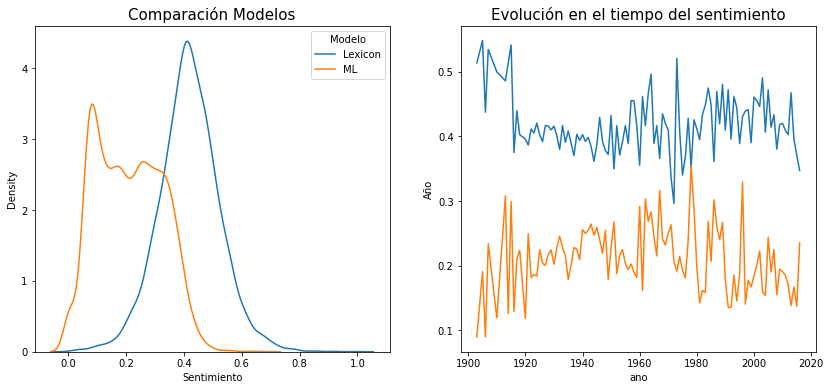

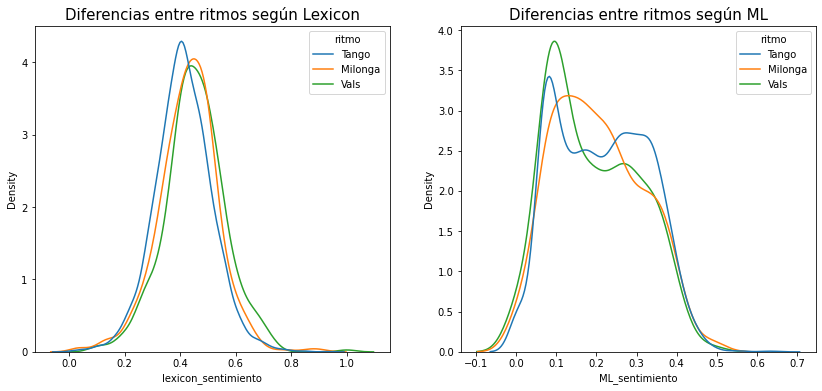

In [ ]:
fix, axs = plt.subplots(1,2, figsize = (14,6))

axs[0].set_title('Comparación Modelos',
                 fontsize = 15)
sbn.kdeplot(data = d_tangos,
            x = 'lexicon_sentimiento',
            ax = axs[0],
            label = 'Lexicon')
sbn.kdeplot(data = d_tangos,
            x = 'ML_sentimiento',
            ax = axs[0],
            label = 'ML')
axs[0].legend(title = 'Modelo')
axs[0].set_xlabel('Sentimiento')


axs[1].set_title('Evolución en el tiempo del sentimiento',
                 fontsize = 15)

d_tangos[d_tangos.ritmo == 'Tango'].dropna(subset = ['ano']).groupby('ano').lexicon_sentimiento.mean().plot(ax = axs[1])
d_tangos[d_tangos.ritmo == 'Tango'].dropna(subset = ['ano']).groupby('ano').ML_sentimiento.mean().plot(ax = axs[1])

axs[1].set_ylabel('Año')
plt.show()

fix, axs = plt.subplots(1,2, figsize = (14,6))

axs[0].set_title('Diferencias entre ritmos según Lexicon',
                 fontsize = 15)
sbn.kdeplot(data = d_tangos[d_tangos.ritmo.isin(['Tango', 'Milonga','Vals'])],
            x = 'lexicon_sentimiento',
            ax = axs[0],
            hue = 'ritmo',
            common_norm = False
            ) 


axs[1].set_title('Diferencias entre ritmos según ML',
                 fontsize = 15)

sbn.kdeplot(data = d_tangos[d_tangos.ritmo.isin(['Tango', 'Milonga','Vals'])],
            x = 'ML_sentimiento',
            ax = axs[1],
            hue = 'ritmo',
            common_norm = False
            ) 

plt.show()

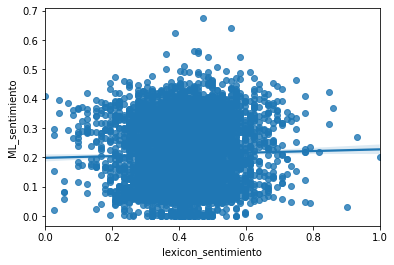

In [ ]:
sbn.regplot(data = d_tangos,
                x = 'lexicon_sentimiento',
                y = 'ML_sentimiento')

Por último, tratemos de ver qué palabras sobre salen para los principales temas ordenados según sentimiento. 

Para eso, introducimos una función que podrá ser de utilidad para próximas clases. La misma, procesa textos, y nos devuelve el mismos dataframe con una columna de texto procesado, al mismo tiempo que una base de términos y una matriz de temas en el espacio de palabras.

In [ ]:
def pre_procesaTexto(df, col_texto, tfidf = False, col_nombre = 'titulo', tipo_matriz = 'df'):
    """
    Esta función preprocesa los textos de un data frame.

    Es necesario pasarle:
        - df: pd.DataFrame()
          el data frame de nuestros datos
        - col_texto: str
          el nombre de la columna que contiene los textos
        - tfidf: Boolean (default = False)
          indica si queremos que nos devuelva la descripción tfidf o tf
        - col_nombre: str (default = 'titulo')
          indica cómo se quiere renombrar la matriz de textos en el espacio de términos
        - tipo_matris: str (default = 'df') puede ser df o scp
          si es df, devuelve un pandas dataframe
          si es scp, devuelve una matriz esparsa de scipy 
    Devuelve:
        - base_palabras: Dictionary de gensim
        - d_textos_terminos: pd.DataFrame
          data frame de palabras en el espacio de términos (es muy probable que esto haya que cambiarlo si la base de datos es muy grande)
    """
    df[col_texto + '_proc'] = df[col_texto].apply(lambda letra: list(tokenize(letra.lower())
                                                                )
                                                 ) # Línea para tokenizar (además, nos saca signos de puntuación y números!)
    
    es_stop = nltk.corpus.stopwords.words('spanish')
    df[col_texto + '_proc'] = df[col_texto + '_proc'].apply(lambda letra: list(filter(lambda palabra: palabra not in es_stop,
                                                                                      letra)
                                                                          )
                                                           ) # Línea para filtrar las stopwords
    base_palabras = Dictionary(df[col_texto + '_proc'].to_list()) # Construcción de la base entero - palabra
    df[col_texto + '_proc'] = df[col_texto + '_proc'].apply(lambda letra : base_palabras.doc2bow(letra)) # Descripción de los textos en función de la frecuencia de las palabras
    if tfidf:
        tf_idf = TfidfModel(df[col_texto + '_proc'].to_list(),
                            normalize = True) # De ser requerido, se entrena el modelo TF-IDF
        df[col_texto + '_proc'] = df[col_texto + '_proc'].apply(lambda letra: tf_idf[letra]) # Llevamos tf ------> tf-idf
    if tipo_matriz == 'df':
        d_textos_terminos = pd.DataFrame(corpus2csc(d_tangos['letra' + '_proc']).T.todense(),
                                         columns = list(base_palabras.values()),
                                         index = df[col_nombre].to_list()
                                         ) # Armamos la matriz (en formato pandas) de textos en el espacio de términos
    elif tipo_matriz == 'scp':
        d_textos_terminos = corpus2csc(d_tangos['letra' + '_proc']).T
    else:
        d_textos_terminos = 'No sé qué me pediste'

    return base_palabras, d_textos_terminos

Aplicamos ahora esta función, y utilizamos la matriz d, junto con el ordenamiento producto del sentimiento, para encontrar las palabras que más describen dichos textos

In [ ]:
base, d = pre_procesaTexto(d_tangos, 'letra', tfidf = True)

d_tangos_negativos_Lexicon = d_tangos.sort_values(by = 'lexicon_sentimiento')[:20].titulo
d_tangos_positivos_Lexicon = d_tangos.sort_values(by = 'lexicon_sentimiento',
                                                  ascending = False)[:20].titulo

d_tangos_negativos_ML = d_tangos.sort_values(by = 'ML_sentimiento')[:20].titulo
d_tangos_positivos_ML = d_tangos.sort_values(by = 'ML_sentimiento',
                                             ascending = False)[:20].titulo

y ahora las wordclouds

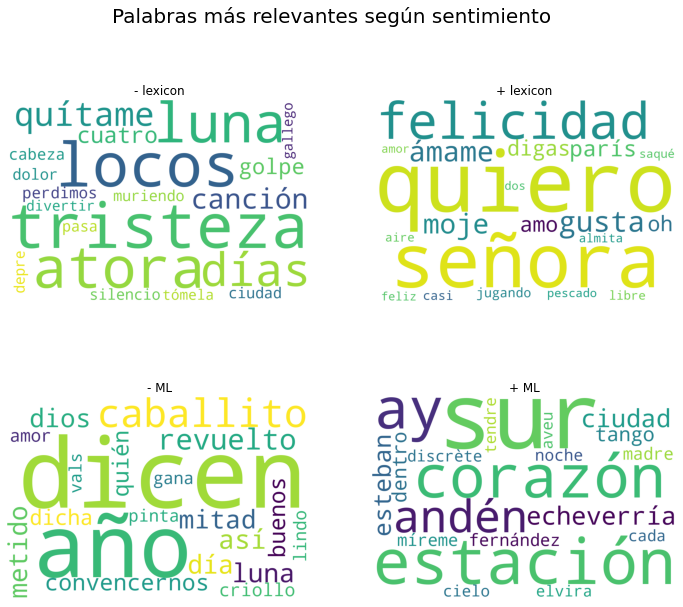

In [ ]:
wc_atributos = {'height' : 800,
                'width' : 1200,
                'background_color' : 'white',
                'max_words' : 20
                } # Defino los parámetros que les voy a pasar a los wordclouds


wc_1 = WordCloud(**wc_atributos # De esta forma, le estoy diciendo a la función que expanda el diccionario de atributos de forma tal de que entienda lo que quiero que haga
                 ).generate_from_frequencies(d.loc[d_tangos_negativos_Lexicon].sum().to_dict())

wc_2 = WordCloud(**wc_atributos
                 ).generate_from_frequencies(d.loc[d_tangos_positivos_Lexicon].sum().to_dict())

wc_3 = WordCloud(**wc_atributos
                 ).generate_from_frequencies(d.loc[d_tangos_negativos_ML].sum().to_dict())

wc_4 = WordCloud(**wc_atributos
                 ).generate_from_frequencies(d.loc[d_tangos_positivos_ML].sum().to_dict())

fig, axs = plt.subplots(2, 2, figsize = (12,10))

fig.suptitle('Palabras más relevantes según sentimiento',
             fontsize = 20)

axs[0,0].set_title('- lexicon')
axs[0,0].imshow(wc_1)
axs[0,0].axis('off')

axs[0,1].set_title('+ lexicon')
axs[0,1].imshow(wc_2)
axs[0,1].axis('off')

axs[1,0].set_title('- ML')
axs[1,0].imshow(wc_3)
axs[1,0].axis('off')

axs[1,1].set_title('+ ML')
axs[1,1].imshow(wc_4)
axs[1,1].axis('off')

plt.show()



Cerrando, deberíamos llevarnos lo siguiente:

*   Existen métodos de análisis de sentimiento en español. Hay que buscarlos más
*   De los que trabajamos acá, encontramos tanto lexicon based como supervised learning based

El primero, SentiLeak, lo usamos:



```
from sentileak import SentiLeak
sentimental = SentiLeak()
sentimental.compute_sentiment(string)
```

El segundo, 
```
from sentiment_analysis_spanish import sentiment_analysis
sentimental = sentiment_analysis.SentimentAnalysisSpanish()
sentimental.sentiment(string)

```



Analizar el problema de las letras del tango a partir de un modelo entrenado a partir de comentarios de compra-venta, ¿es una buena idea?
¿Cómo trabajar en el caso donde existe una enorme diferencia de registro entre los datos de entrenamiento y los datos reales?


In [ ]:
import time
time.sleep(30 * 60)